# 單變量線性回歸模型訓練實作(Simple Linear Regression)
### (不使用 sklearn.linear_model.LinearRegression())

In [806]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [807]:
class SimpleLinearRegression:
    
    def __init__(self):
        self.x_mean = 0
        self.y_mean = 0
        self.Sxx = 0
        self.Sxy = 0
        self.intercept = 0
        self.coefficient = 0
        self.y_hat = []
    
    def fit(self, xtrain, ytrain):

        x = xtrain
        y = ytrain
        n = x.size
                
        self.x_mean = x.mean()[0]                                        # Xi 之中間值
        self.y_mean = y.mean()                                           # Yi 之中間值
         
        x_sum_square = x.sum() **2 
        x_square = x[0:] * x[0:]
        x_square_sum = x_square.sum()
        self.Sxx = (x_square_sum - (x_sum_square / n))[0]                # Xi 之變異數 (variance)
        
        x_sum = x.sum()
        y_sum = y.sum()
        xy = x.mul(y, axis = 0)
        xy_sum = xy.sum()
        self.Sxy = (xy_sum -  (x_sum * y_sum) / n)[0]                    # Yi 之變異數 (variance)
        
        self.coefficient = self.Sxy / self.Sxx                           # calcualte coefficient
        self.intercept = self.y_mean - (self.coefficient * self.x_mean)  # calcualte intercept
                                        
        
    def predict(self, xtest):
        
        x = xtest
                              
        for i in range(len(x)):
            self.y_hat.append(self.intercept + self.coefficient * x.xtest[i])
    
        return np.array(self.y_hat)      
    

Intercept =  7.36363582524877
coefficient =  0.04480054431309109

Model ==>  y^ =  7.36  +  0.04  * x

MSE =  9.957126545802307


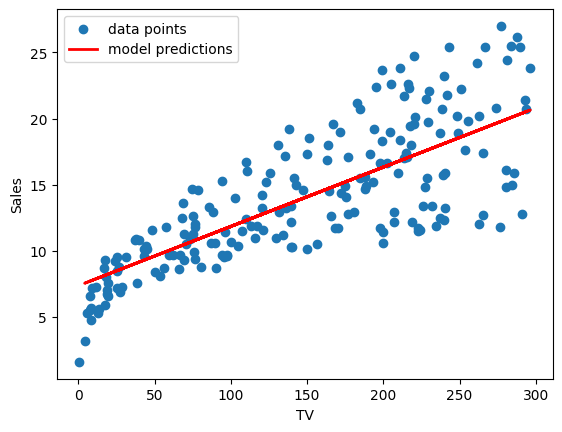

In [808]:
def train_test_split(x,Y,train_size):
    
    import pandas as pd
    import random
    
    xtrain = x
    ytrain = Y
    xtest  = []
    ytest  = []
    
    test_index = []
    data_size = x.size
    number_of_test = int(data_size - (data_size * train_size))
    
    for i in range(0,number_of_test):
        j = np.random.randint(0, data_size)
        test_index = random.sample(range(0, data_size), number_of_test)   # get non-duplicated random integers
        
    for j in test_index:
        xtest.append(x.iat[j,0])
        ytest.append(y[j])
        xtrain = xtrain.drop(j, axis = 0)
        ytrain = ytrain.drop(j)
    
    xtest = pd.DataFrame({"xtest":xtest})
    ytest = pd.Series(ytest)
    
    return xtrain, xtest, ytrain, ytest


def mean_squared_error(ytest, y_hat):
        
    i = 0
    y_diff_square_sum = 0
    for y1 in ytest:
        y_diff_square_sum += (y1 - y_hat[i])**2
        i += 1
    MSE = y_diff_square_sum/ytest.size
    
    return MSE
        

""" Using Harvard CS109A Advertising dataset(Advertising.csv) to create Simple Liner Regression model """


if __name__ == '__main__':
    # Data set used in this exercise
    data_filename = 'Advertising.csv'

    # Read the data using pandas libraries
    df = pd.read_csv(data_filename)
    
    # Set "TV" as the predictors x from the previous list
    x = df[['TV']]
    
    # set "Sales" as the the reponse variable Y
    Y = df["Sales"]
    
    # Splitting the data into train-test sets with 80% training data and 20% testing data.
    xtrain, xtest, ytrain, ytest = train_test_split(x,Y,train_size=0.8)
    
    # Call LinearRegression() to create a SimpleLinearRegression object and fit the model
    model = SimpleLinearRegression()
    model.fit(xtrain,ytrain)
    
    # Predict the response variable for the test set
    y_pred = model.predict(xtest)
    
    # Make a plot of the data along with the predicted linear regression
    fig, ax = plt.subplots()
    ax.scatter(x, y, label='data points')
    ax.plot(xtest, y_pred, color='red',linewidth=2,label='model predictions')
    ax.set_xlabel('TV')
    ax.set_ylabel('Sales')
    ax.legend()
    
     
    # print("x mean = ", model.x_mean)
    # print("y mean = ", model.y_mean)
    # print("Sxx =", model.Sxx)
    # print("Sxy =", model.Sxy)
    print("Intercept = ", model.intercept)
    print("coefficient = ", model.coefficient)
    print("\nModel ==> ", "y^ = ", round(model.intercept,2), " + ", round(model.coefficient, 2), " * x")
    
    # Model Evaluation: MSE (Mean Square Error)
    MSE = mean_squared_error(ytest, y_pred)
    print("\nMSE = ", MSE)
    

## 原理介紹

<img src="slr01.jpg" style="width: 500px;">
<img src="slr02.jpg" style="width: 500px;">
<img src="slr03.jpg" style="width: 500px;">
<img src="slr04.jpg" style="width: 500px;">
<img src="slr05.jpg" style="width: 500px;">
<img src="slr06.jpg" style="width: 500px;">
<img src="slr07.jpg" style="width: 500px;">
<img src="slr08.jpg" style="width: 500px;">
<img src="slr09.jpg" style="width: 500px;">